# GRUPO 9: DATASET CREDIT CARD FRAUD

Objetivo Principal:

* Desarrollar un modelo de aprendizaje automático que clasifique transacciones de tarjetas de crédito como fraudulentas o no fraudulentas.

Objetivos Específicos:

* Implementar la técnica Sobremuestreo con Synthetic Minority Oversampling Technique (SMOTE) para el ajuste del desbalance del dataset. 
* Entrenar y comparar múltiples modelos (regresión logística, Random Forest, redes neuronales)
* Seleccionar el modelo óptimo basado en un conjunto diverso de métricas:
    * AUC-ROC (Área bajo la curva ROC): Para evaluar el desempeño general del clasificador.
    * Recall o Sensibilidad: Para medir la proporción de fraudes correctamente detectados.
    * Precision: Para evaluar la precisión de las transacciones clasificadas como fraudulentas.

Criterios de Éxito
* AUC-ROC ≥ 0.85

    Justificación: Un valor de AUC-ROC ≥ 0.85 indica que el modelo puede distinguir con alta eficacia entre transacciones fraudulentas y no fraudulentas en todos los umbrales. Esto asegura que tanto los verdaderos positivos (fraudes detectados) como los verdaderos negativos (transacciones legítimas correctamente clasificadas) se gestionen adecuadamente.

* Criterio de éxito: Recall ≥ 80%

    Justificación: En el contexto de detección de fraudes, es crítico minimizar los falsos negativos (fraudes no detectados). Un recall ≥ 80% significa que el modelo identifica al menos 8 de cada 10 fraudes, lo cual es esencial para la confianza del cliente y la eficacia operativa.

* Criterio de éxito: Precision ≥ 50%

    Justificación: Aunque es importante identificar fraudes, un modelo con alta precisión asegura que la mayoría de las transacciones marcadas como fraudulentas realmente lo sean. Esto reduce las falsas alarmas, evitando el impacto negativo en clientes legítimos. Un valor ≥ 50% garantiza un equilibrio razonable en un problema altamente desbalanceado.


Falta:
* Añadir más gráficos e incluir una breve interpretación
* Análisis de correlación y explicar brevemente
* Detección de patrones
* Sería útil visualizar cómo se distribuyen las transacciones fraudulentas (Class = 1) en función del tiempo.

# Resumen del dataset:

El conjunto de datos contiene información sobre las transacciones realizadas con tarjetas de crédito por titulares europeos durante dos días específicos de septiembre de 2013. En total, se registraron 284,807 transacciones, de las cuales 492 fueron fraudulentas. Esto indica que el conjunto de datos está altamente desbalanceado, ya que la clase positiva (transacciones fraudulentas) representa solo el 0.173% del total de las transacciones.

Para cada transacción:
***********************************************************************************************************************************
* La característica Time representa el tiempo (en segundos) transcurrido entre esa transacción y la primera transacción registrada.

* La característica Amount indica el monto de la transacción.

* La característica Class clasifica la transacción según su autenticidad:

    * 0: Transacción auténtica.

    * 1: Transacción fraudulenta.

El resto de las variables (V1 a V28) son el resultado de una transformación por Análisis de Componentes Principales (PCA) aplicada a las características originales. Estas características originales no están disponibles en el conjunto de datos debido a razones de confidencialidad.

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import plotly.express as px


# Cargar el dataset
data = pd.read_csv('creditcard.csv')

# Ver las primeras filas para explorar la estructura
print(data.head())

# Dimensiones del dataset
print(f'Dimensiones del dataset: {data.shape}')




   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

 # Exploración Inicial


In [27]:
# Verificar tipos de datos y valores nulos
print(data.info())

# Resumen estadístico
#Proporciona estadísticas básicas como media, desviación estándar, etc., para cada variable.
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

b) Distribución de la variable objetivo (Class):

In [28]:
# Conteo de valores de la clase objetivo
print(data['Class'].value_counts())

# Porcentaje de fraudes
fraude_ratio = data['Class'].mean() * 100
print(f'Porcentaje de fraudes: {fraude_ratio:.2f}%')


Class
0    284315
1       492
Name: count, dtype: int64
Porcentaje de fraudes: 0.17%


3. Visualización de los datos:
4. a) Distribución de Time y Amount:

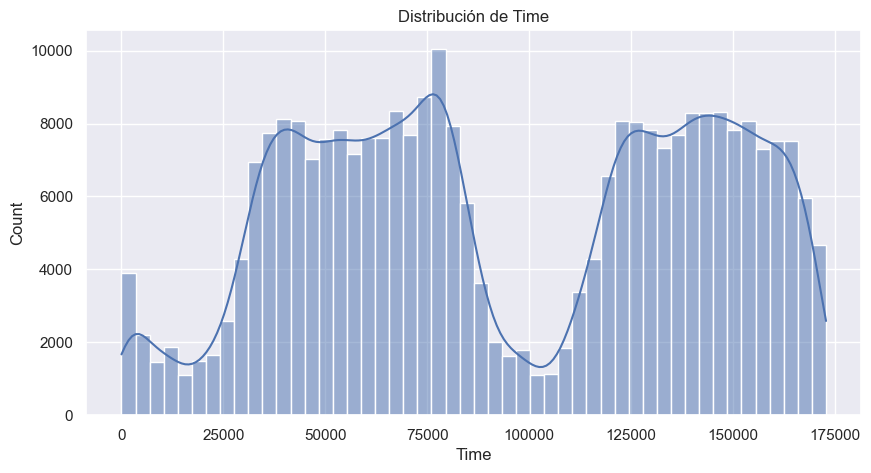

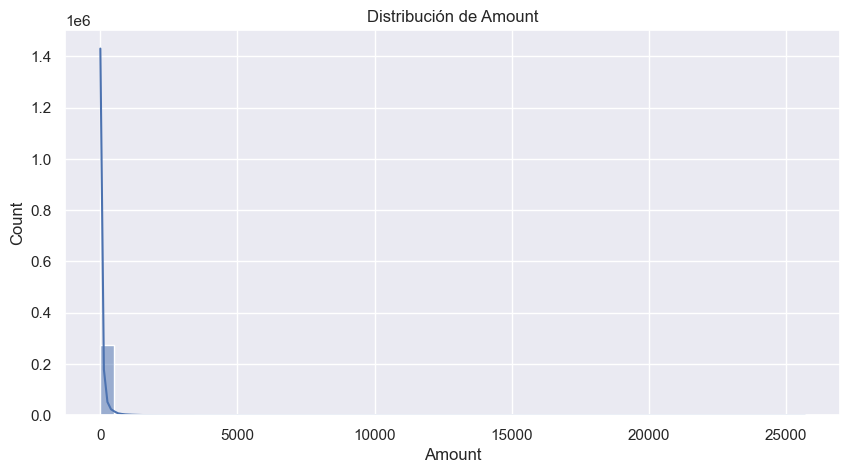

In [29]:

# Histograma de la variable Time
plt.figure(figsize=(10, 5))
sns.histplot(data['Time'], bins=50, kde=True)
plt.title('Distribución de Time')
plt.show()

# Histograma de Amount
plt.figure(figsize=(10, 5))
sns.histplot(data['Amount'], bins=50, kde=True)
plt.title('Distribución de Amount')
plt.show()


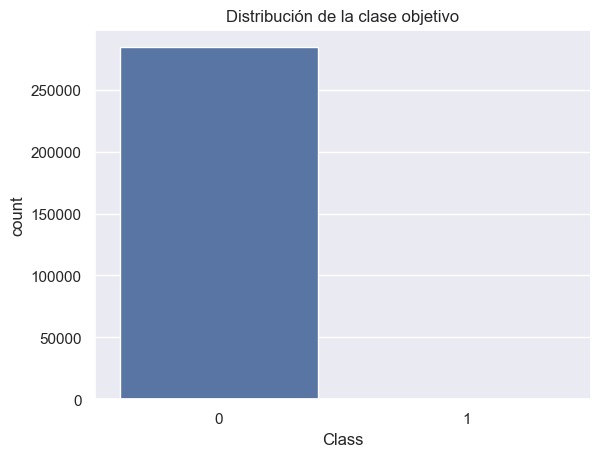

In [30]:
#b) Distribución de ls clase objetivo
sns.countplot(x='Class', data=data)
plt.title('Distribución de la clase objetivo')
plt.show()


# Escalado de las Variables (Time y Amount)
Aunque las variables principales ya están normalizadas (debido a la PCA), Time y Amount podrían requerir estandarización.

In [31]:
from sklearn.preprocessing import StandardScaler

# Escalado de las variables Time y Amount
scaler = StandardScaler()
data[['Time', 'Amount']] = scaler.fit_transform(data[['Time', 'Amount']])

print("\n-> Las variables 'Time' y 'Amount' fueron escaladas con StandardScaler.")
print(data[['Time', 'Amount']].describe())



-> Las variables 'Time' y 'Amount' fueron escaladas con StandardScaler.
               Time        Amount
count  2.848070e+05  2.848070e+05
mean  -3.065637e-16  2.913952e-17
std    1.000002e+00  1.000002e+00
min   -1.996583e+00 -3.532294e-01
25%   -8.552120e-01 -3.308401e-01
50%   -2.131453e-01 -2.652715e-01
75%    9.372174e-01 -4.471707e-02
max    1.642058e+00  1.023622e+02


# Balanceo de Clases
Debido al desbalance extremo (0.172% de fraudes), es importante preparar estrategias. Por ahora, puedes separar las clases para luego usar técnicas de balanceo.

In [32]:
# Separar las clases
fraudes = data[data['Class'] == 1]
no_fraudes = data[data['Class'] == 0]

print(f'Transacciones fraudulentas: {len(fraudes)}')
print(f'Transacciones no fraudulentas: {len(no_fraudes)}')


Transacciones fraudulentas: 492
Transacciones no fraudulentas: 284315


#  División del Dataset
Dividir los datos en conjuntos de entrenamiento y prueba es crucial para evaluar el modelo de manera objetiva.

In [33]:
from sklearn.model_selection import train_test_split

# Separar las características (X) y la clase objetivo (y)
X = data.drop(columns=['Class'])  # Eliminar la columna objetivo
y = data['Class']                 # Clase objetivo

# Dividir en entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f'Tamaño del conjunto de entrenamiento: {X_train.shape}')
print(f'Tamaño del conjunto de prueba: {X_test.shape}')


Tamaño del conjunto de entrenamiento: (199364, 30)
Tamaño del conjunto de prueba: (85443, 30)


# Balanceo de Clases
El dataset está desbalanceado, lo que puede causar que el modelo se incline hacia la clase mayoritaria. 
Para evitarlo, se puede aplicar undersampling u oversampling.

In [34]:
from imblearn.over_sampling import SMOTE

# Aplicar SMOTE al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print(f'Nuevas dimensiones tras SMOTE: {X_train_balanced.shape}')
print(f'Clase 0: {(y_train_balanced == 0).sum()} | Clase 1: {(y_train_balanced == 1).sum()}')


Nuevas dimensiones tras SMOTE: (398040, 30)
Clase 0: 199020 | Clase 1: 199020


# Modelo 1: Regresión Logística

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
# Inicializar y entrenar el modelo
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train_balanced, y_train_balanced)

LogisticRegression(max_iter=1000, random_state=42)

Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.06      0.88      0.12       148

    accuracy                           0.98     85443
   macro avg       0.53      0.93      0.55     85443
weighted avg       1.00      0.98      0.99     85443



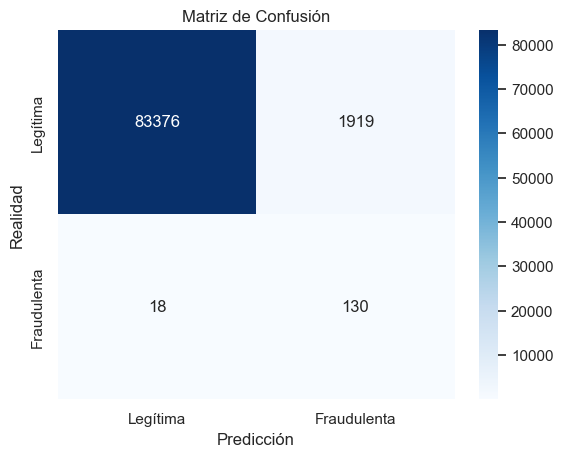

In [37]:
# Realizar predicciones
y_pred = logistic_model.predict(X_test)
y_pred_proba = logistic_model.predict_proba(X_test)[:, 1]

# Reporte de clasificación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Legítima', 'Fraudulenta'], yticklabels=['Legítima', 'Fraudulenta'])
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.title('Matriz de Confusión')
plt.show()

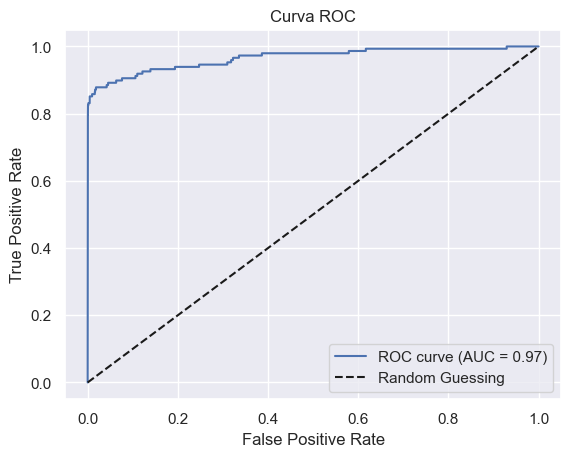

In [38]:
# Calcular y graficar la curva ROC
roc_auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

Ajuste de hiperparámetros

In [41]:
param_grid = {
    'C': [0.01, 0.1, 1],  # Reducir el rango de C
    'class_weight': ['balanced'],  # Fijar class_weight
    'solver': ['liblinear']  # Fijar el solver
}
grid_search = GridSearchCV(estimator=logistic_model, param_grid=param_grid, scoring='f1', cv=3, n_jobs=-1)
grid_search.fit(X_train_balanced, y_train_balanced)
print("Mejores hiperparámetros:", grid_search.best_params_)

Mejores hiperparámetros: {'C': 1, 'class_weight': 'balanced', 'solver': 'liblinear'}


In [42]:
# Extraer los mejores parámetros del grid search
best_params = grid_search.best_params_

# Entrenar el modelo con los mejores parámetros
final_model = LogisticRegression(
    C=best_params['C'], 
    class_weight=best_params['class_weight'], 
    solver=best_params['solver'], 
    max_iter=1000, 
    random_state=42
)
final_model.fit(X_train_balanced, y_train_balanced)

LogisticRegression(C=1, class_weight='balanced', max_iter=1000, random_state=42,
                   solver='liblinear')

Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.06      0.88      0.12       148

    accuracy                           0.98     85443
   macro avg       0.53      0.93      0.55     85443
weighted avg       1.00      0.98      0.99     85443



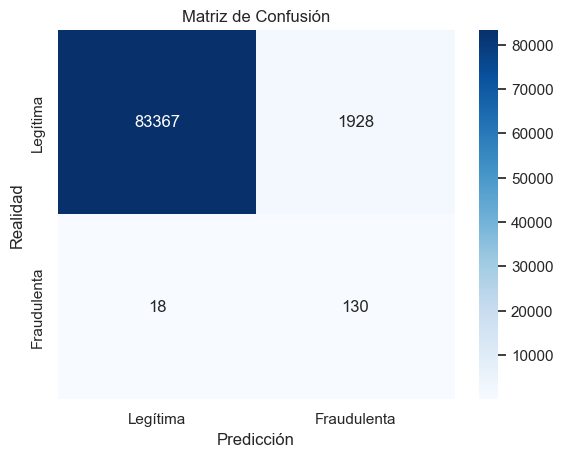

In [43]:
from sklearn.metrics import classification_report, confusion_matrix

# Predicciones
y_pred = final_model.predict(X_test)
y_pred_proba = final_model.predict_proba(X_test)[:, 1]

# Reporte de clasificación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Legítima', 'Fraudulenta'], yticklabels=['Legítima', 'Fraudulenta'])
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.title('Matriz de Confusión')
plt.show()


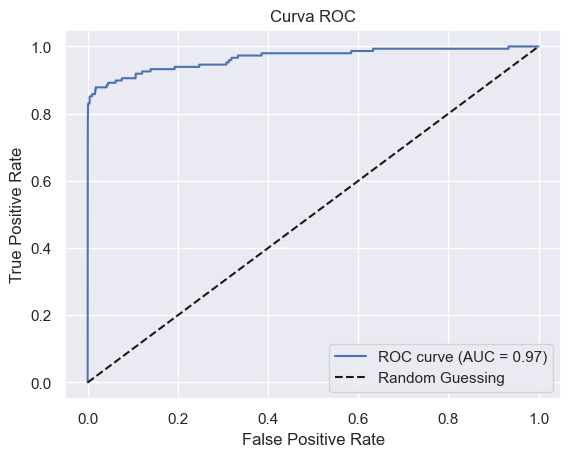

In [44]:
from sklearn.metrics import roc_auc_score, roc_curve

# Calcular la curva ROC
roc_auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

# Graficar la curva ROC
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()


Obs: No se observan cambios en las métricas